In [2]:
# Data dictionary:

# loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
# term : The number of payments on the loan. Values are in months and can be either 36 or 60.
# int_rate : Interest Rate on the loan
# installment : The monthly payment owed by the borrower if the loan originates.
# grade : LoanTap assigned loan grade
# sub_grade : LoanTap assigned loan subgrade
# emp_title :The job title supplied by the Borrower when applying for the loan.*
# emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
# home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
# annual_inc : The self-reported annual income provided by the borrower during registration.
# verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
# issue_d : The month which the loan was funded
# loan_status : Current status of the loan - Target Variable
# purpose : A category provided by the borrower for the loan request.
# title : The loan title provided by the borrower
# dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
# earliest_cr_line :The month the borrower's earliest reported credit line was opened
# open_acc : The number of open credit lines in the borrower's credit file.
# pub_rec : Number of derogatory public records
# revol_bal : Total credit revolving balance
# revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
# total_acc : The total number of credit lines currently in the borrower's credit file
# initial_list_status : The initial listing status of the loan. Possible values are – W, F
# application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
# mort_acc : Number of mortgage accounts.
# pub_rec_bankruptcies : Number of public record bankruptcies
# Address: Address of the individual



In [3]:
# What does ‘good’ look like?

# Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
# Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)
# Check correlation among independent variables and how they interact with each other
# Simple Feature Engineering steps:
# E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

# 1. Pub_rec
# 2. Mort_acc
# 3. Pub_rec_bankruptcies

# Missing values and Outlier Treatment
# Scaling - Using MinMaxScaler or StandardScaler
# Use Logistic Regression Model from Sklearn/Statsmodel library and explain the results
# Results Evaluation:
# Classification Report
# ROC AUC curve
# Precision recall curve
# Tradeoff Questions:
# How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
# Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone
# Provide actionable Insights & Recommendations
# Evaluation Criteria (100 points)


In [4]:
# Define Problem Statement and perform Exploratory Data Analysis (10 points)
# Definition of problem (as per given problem statement with additional views)
# Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
# Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
# Bivariate Analysis (Relationships between important variable)
# Illustrate the insights based on EDA
# Comments on range of attributes, outliers of various attributes
# Comments on the distribution of the variables and relationship between them
# Comments for each univariate and bivariate plots
# Data Preprocessing (20 Points)
# Duplicate value check
# Missing value treatment
# Outlier treatment
# Feature engineering
# Data preparation for modeling
# Model building (10 Points)
# Build the Logistic Regression model and comment on the model statistics
# Display model coefficients with column names
# Results Evaluation (50 Points)
# ROC AUC Curve & comments (10 Points)
# Precision Recall Curve & comments (10 Points)
# Classification Report (Confusion Matrix etc) (10 Points)
# Tradeoff Questions:
# How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. (10 Points)
# Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. (10 Points)
# Actionable Insights & Recommendations (10 Points)

In [5]:
# Questionnaire (Answers should present in the text editor along with insights):

# What percentage of customers have fully paid their Loan Amount?
# Comment about the correlation between Loan Amount and Installment features.
# The majority of people have home ownership as _______.
# People with grades ‘A’ are more likely to fully pay their loan. (T/F)
# Name the top 2 afforded job titles.
# Thinking from a bank's perspective, which metric should our primary focus be on..
# ROC AUC
# Precision
# Recall
# F1 Score
# How does the gap in precision and recall affect the bank?
# Which were the features that heavily affected the outcome?
# Will the results be affected by geographical location? (Yes/No)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [7]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')

In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [9]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [10]:
cols = ['loan_amnt', 'int_rate', 'installment', 'grade',
       'emp_length','annual_inc',
       'verification_status',  
       'dti','open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc','term', 'pub_rec_bankruptcies']
target = ['loan_status']

In [11]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


From the data, we can observe that there are:
1. Loan Amount count is around 396030 and wrt to interest rate of Loan amt all data points are seems to be intact. 
2. The maximum loan amt seems to be 40k and similarly the interest rate for that is near to 30.99%. 
3. The installment for all this loans are seems to be econimic, as the max amount of installment is 1533. 
4. The annual income and loan amt is seemingly not getting any correlated, but it will be get cleared on correlation data. 
5. DTI(Debt to INcome ratio) according to above the observation, the ratio should be smaller, but in data it is seemingly opposite.
6. Other columns related to Accounts are seemingly dependent on each others.

In [12]:
for i in cols:
  print(i," ",df[i].nunique())

loan_amnt   1397
int_rate   566
installment   55706
grade   7
emp_length   11
annual_inc   27197
verification_status   3
dti   4262
open_acc   61
pub_rec   20
revol_bal   55622
revol_util   1226
total_acc   118
initial_list_status   2
application_type   3
mort_acc   33
term   2
pub_rec_bankruptcies   9


After getting unique values from all columns, we can say the categorical columns are:
1. Grade
2. Emp Length
3. Verification Status
4. Intial and Application Status
5. Term
6. Pub_rec_bankruptcies

In [13]:
df.shape

(396030, 27)

So the dataframe Shape is 396k with 27 features.

# What percentage of customers have fully paid their Loan Amount?

In [175]:
df['loan_status'].value_counts(normalize =True)*100

Fully Paid     80.385533
Charged Off    19.614467
Name: loan_status, dtype: float64

## So around 80% customers loans are fully paid.

# What percentage of customers have opted for Less Loan Terms?

In [177]:
df['term'].value_counts(normalize = True)*100

 36 months    76.28401
 60 months    23.71599
Name: term, dtype: float64

As we can see 76% people have opted for 36 months tenure, as they want finish the loan as soon as possible.

# Null Values Detection and Treatment

In [16]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

As from above observations, we can clearly see the null values present in many of the Features.

In [17]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

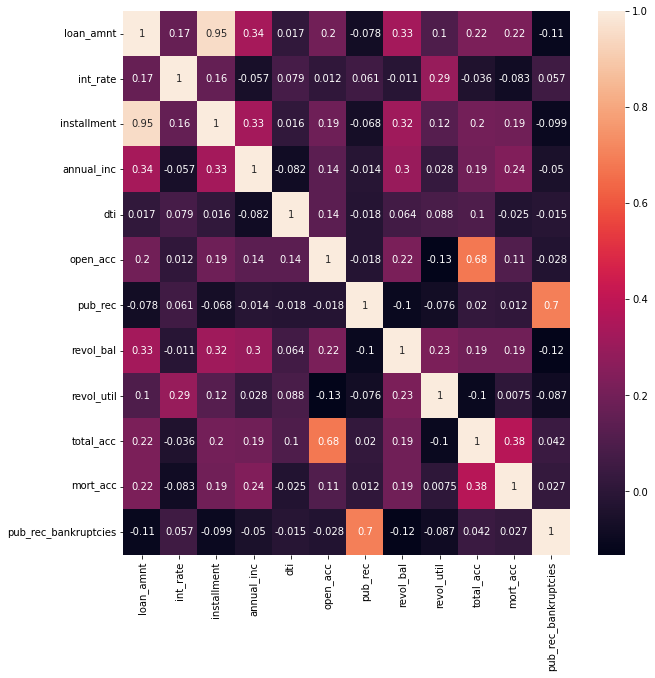

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

## Comment about the correlation between Loan Amount and Installment features.


As we can clearly see from Heatmap, as there is high Correlation between these Features. And other than this, Total Account vs Open Account, Pub_rec vs Pub_rec_bankrupties also have a good correlation.

In [20]:
round((df['emp_title'].isnull().sum())/(df.shape[0])*100,2)

5.79

In [21]:
round((df['emp_length'].isnull().sum())/(df.shape[0])*100,2)


4.62

In [22]:
round((df['mort_acc'].isnull().sum())/(df.shape[0])*100,2)

9.54

As we can clealy see the amount of Null Values present in the features.

In [23]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [24]:
df['mort_acc'] = [1.0 if x >=1.0 else 0.0 for x in df['mort_acc']]


In [25]:
round((df['mort_acc'].isnull().sum())/(df.shape[0])*100,2)

0.0

# Name the top 2 afforded job titles.


In [26]:
df['emp_title'].value_counts().head(10)

Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
Name: emp_title, dtype: int64

It seems to be the Job titles that are Teachers and Manager.

In [27]:
import random

In [28]:
title = ['Teacher','Manager','Registered Nurse','RN','Supervisor','Sales','Project Manager']

In [29]:
df['emp_title'] = df['emp_title'].fillna(random.choice(title))

In [30]:
df['emp_title'].value_counts().head(10)

Supervisor          24757
Teacher              4389
Manager              4250
Registered Nurse     1856
RN                   1846
Sales                1638
Project Manager      1505
Owner                1410
Driver               1339
Office Manager       1218
Name: emp_title, dtype: int64

In [31]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [32]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [33]:
df['emp_length'] = df['emp_length'].str.replace('years', '')
df['emp_length'] = df['emp_length'].str.replace('year', '')

In [34]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [35]:
df['pub_rec_bankruptcies'] = [1.0 if x >=1.0 else 0.0 for x in df['pub_rec_bankruptcies']]

In [36]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350915
1.0     45115
Name: pub_rec_bankruptcies, dtype: int64

In [37]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
dtype: int64

In [38]:
df = df.dropna(subset=['title','revol_util'])

In [39]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length              18076
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


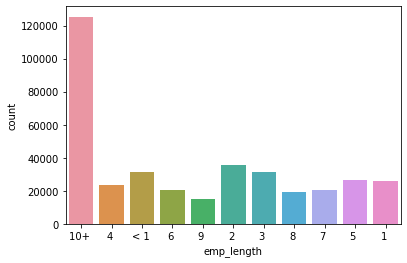

In [40]:
sns.countplot(df['emp_length'])

In [41]:
df['emp_length'] = df['emp_length'].fillna('10+')

We can see from Count Plot most of the datapoints are pointing towards 10+ exp length, so from these we can guesstimate the age of customers to be near to 35+ years.

In [42]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [43]:
df['pub_rec'] = [1.0 if x >=1.0 else 0.0 for x in df['pub_rec']]

In [44]:
from sklearn.model_selection import train_test_split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(df[cols], df[target], test_size=0.2,random_state = 4)
X_train,X_val,y_train,y_val = train_test_split(X_tr_cv,y_tr_cv,test_size = 0.25,random_state =4 )
print("X_train: ",X_train.shape,"X_validation: ", X_val.shape,"X_test: ",X_test.shape,"Y_train",y_train.shape,"Y_val: ",y_val.shape,"Y_test: ",y_test.shape)

X_train:  (236400, 18) X_validation:  (78800, 18) X_test:  (78800, 18) Y_train (236400, 1) Y_val:  (78800, 1) Y_test:  (78800, 1)


In [45]:
X_train.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'annual_inc', 'verification_status', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'term', 'pub_rec_bankruptcies'],
      dtype='object')

In [46]:
# from sklearn.preprocessing import OrdinalEncoder
# enc = OrdinalEncoder()
# enc.fit(X_train['grade'].values.reshape(-1,1))

In [47]:
# X_train['grade'] = enc.transform(X_train['grade'].values.reshape(-1,1))
# X_test['grade']= enc.transform(X_test['grade'].values.reshape(-1,1))

In [48]:
X_train.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,term,pub_rec_bankruptcies
295,12000.0,13.99,279.16,C,10+,36000.0,Source Verified,22.40,11.0,1.0,5901.0,40.1,16.0,w,INDIVIDUAL,0.0,60 months,0.0
66762,28000.0,16.20,987.17,C,10+,110000.0,Source Verified,14.07,20.0,0.0,25207.0,86.3,35.0,w,INDIVIDUAL,1.0,36 months,0.0
317793,11000.0,13.11,371.22,B,10+,52000.0,Verified,23.58,10.0,0.0,17348.0,72.3,40.0,f,INDIVIDUAL,1.0,36 months,0.0
362796,14000.0,12.39,467.62,C,10+,84000.0,Source Verified,21.19,21.0,0.0,36123.0,85.8,32.0,w,INDIVIDUAL,1.0,36 months,0.0
136701,7200.0,10.99,235.69,B,10+,18000.0,Not Verified,15.27,9.0,1.0,11347.0,28.7,26.0,w,INDIVIDUAL,1.0,36 months,1.0


In [49]:
X_train.dtypes

loan_amnt               float64
int_rate                float64
installment             float64
grade                    object
emp_length               object
annual_inc              float64
verification_status      object
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
term                     object
pub_rec_bankruptcies    float64
dtype: object

# Encoding all Object Columns:

In [50]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
cols1 = ['grade','verification_status','emp_length','initial_list_status','application_type','term']
for i in cols1:
  enc.fit(X_train[i].values.reshape(-1,1))
  X_train[i] = enc.transform(X_train[i].values.reshape(-1,1))
  X_val[i] = enc.transform(X_val[i].values.reshape(-1,1))
  X_test[i]= enc.transform(X_test[i].values.reshape(-1,1))

In [51]:
print('X_train = ',X_train.dtypes,'X_val = ',X_val.dtypes, 'X_test = ',X_test.dtypes)

X_train =  loan_amnt               float64
int_rate                float64
installment             float64
grade                   float64
emp_length              float64
annual_inc              float64
verification_status     float64
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status     float64
application_type        float64
mort_acc                float64
term                    float64
pub_rec_bankruptcies    float64
dtype: object X_val =  loan_amnt               float64
int_rate                float64
installment             float64
grade                   float64
emp_length              float64
annual_inc              float64
verification_status     float64
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_

In [52]:
print('y_train = ',y_train.dtypes,'y_val = ',y_val.dtypes, 'y_test = ',y_test.dtypes)

y_train =  loan_status    object
dtype: object y_val =  loan_status    object
dtype: object y_test =  loan_status    object
dtype: object


In [53]:
oe = OrdinalEncoder()
oe.fit(y_train)
y_train = oe.transform(y_train)
y_val = oe.transform(y_val)
y_test = oe.transform(y_test)

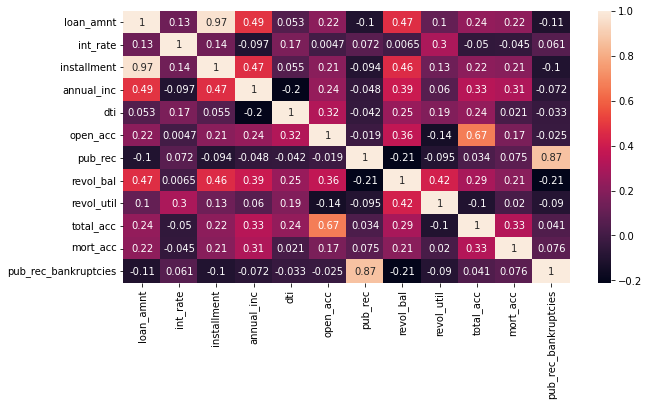

In [54]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(method ='spearman'),annot=True)

Features with High Correlation between them:
1. loanamt = instament, anninc,openacc,pubrec,pubrecbc,revolb
2. instament = ann_inc, revolb, totacc, mortacc
3. anninc = -dti, revolb,totacc, mortacc
4. openacc = totb, revolb
5. pubrec = -revolb,pubrecb

In [56]:
X_train['installment'].nunique()

44945

In [57]:
for i in cols:
  print(i," ",X_train[i].nunique())


loan_amnt   1376
int_rate   553
installment   44945
grade   7
emp_length   12
annual_inc   18178
verification_status   3
dti   4148
open_acc   55
pub_rec   2
revol_bal   47795
revol_util   1170
total_acc   112
initial_list_status   2
application_type   3
mort_acc   2
term   2
pub_rec_bankruptcies   2


In [180]:
df['grade'].value_counts(normalize = True)*100

B    29.328934
C    26.747462
A    16.237310
D    16.022335
E     7.937310
F     2.959645
G     0.767005
Name: grade, dtype: float64

In [184]:
df['application_type'].value_counts(normalize = True)*100

INDIVIDUAL    99.842386
JOINT          0.090355
DIRECT_PAY     0.067259
Name: application_type, dtype: float64

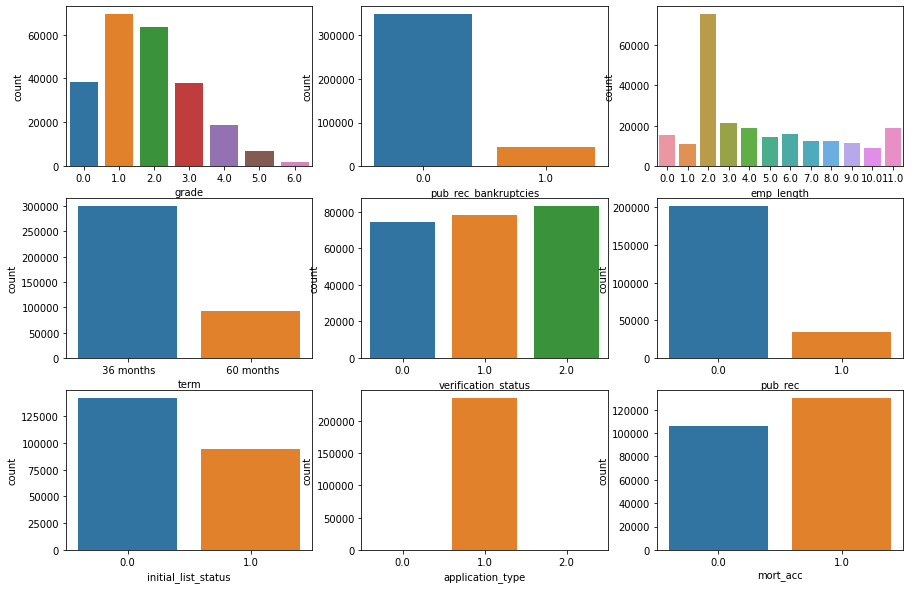

In [58]:
fig,axes = plt.subplots(nrows = 3,ncols = 3,figsize=(15, 10))
sns.countplot(data = X_train,x='grade',ax = axes[0,0])
sns.countplot(data = X_train,x='emp_length',ax = axes[0,2])
sns.countplot(x = df['term'],ax=axes[1,0])
sns.countplot(x = X_train['verification_status'],ax=axes[1,1])
sns.countplot(x = X_train['pub_rec'],ax=axes[1,2])
sns.countplot(x = X_train['initial_list_status'],ax=axes[2,0])
sns.countplot(x = X_train['application_type'],ax=axes[2,1])
sns.countplot(x = X_train['mort_acc'],ax=axes[2,2])
sns.countplot(x = df['pub_rec_bankruptcies'],ax=axes[0,1])

From above plots we can conclude that:
1. The bank has given most of its customer a good rating i.e A,B,C,D and the ratio of them are also most likely same. 
2. Bank has registered a very less number of pub_rec_bankruptcies which is again a good info. 
3. Verification status is seems to be same for all data points, i.e bank doesnot verify the customer background often.
4. In Appplication type, we can clearly see domination of one categories over other, i.e Individual

In [59]:
X_train.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'annual_inc', 'verification_status', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'term', 'pub_rec_bankruptcies'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

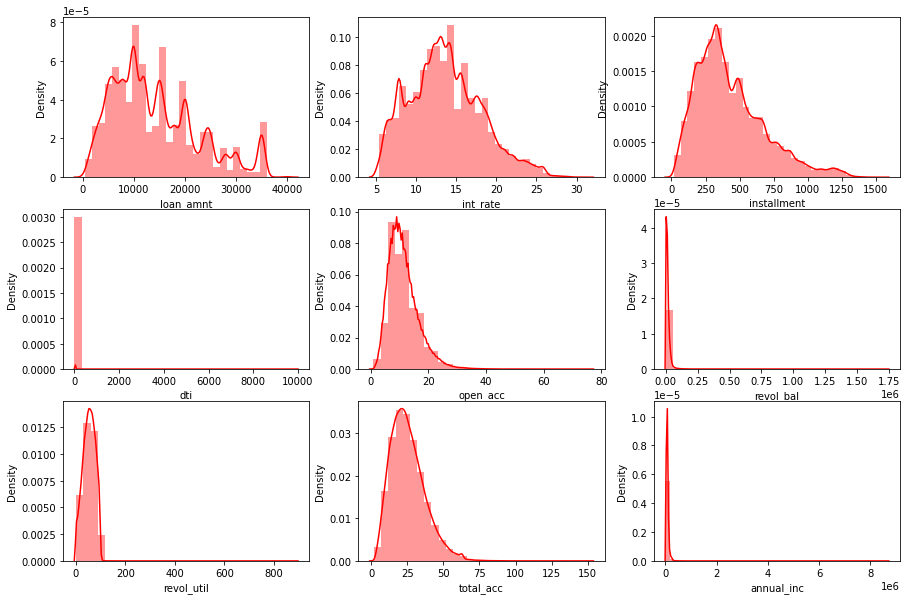

In [60]:
fig,axes = plt.subplots(nrows = 3,ncols = 3,figsize=(15, 10))
sns.distplot(X_train['loan_amnt'], kde = True, color ='red', bins = 30,ax = axes[0,0])
sns.distplot(X_train['int_rate'], kde = True, color ='red', bins = 30,ax = axes[0,1])
sns.distplot(X_train['installment'], kde = True, color ='red', bins = 30,ax = axes[0,2])
sns.distplot(X_train['dti'], kde = True, color ='red', bins = 30,ax = axes[1,0])
sns.distplot(X_train['open_acc'], kde = True, color ='red', bins = 30,ax = axes[1,1])
sns.distplot(X_train['revol_bal'], kde = True, color ='red', bins = 30,ax = axes[1,2])
sns.distplot(X_train['revol_util'], kde = True, color ='red', bins = 30,ax = axes[2,0])
sns.distplot(X_train['total_acc'], kde = True, color ='red', bins = 30,ax = axes[2,1])
sns.distplot(X_train['annual_inc'], kde = True, color ='red',ax = axes[2,2])

plt.show()

From above Distplots, we can conclude some statements:
1. Almost every features is following a log-curve over there datapoints, unless some outliers are present.
2. Loan amount seems to be well balanced as bank had not provided a huge amount of money to more customers.
3. Interest rate is also seeming good, where mean is present around 15%.
4. Installment columns are also seems to be very stable and focusing only on some specific amount.

# Outliers Detection And Treatment

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

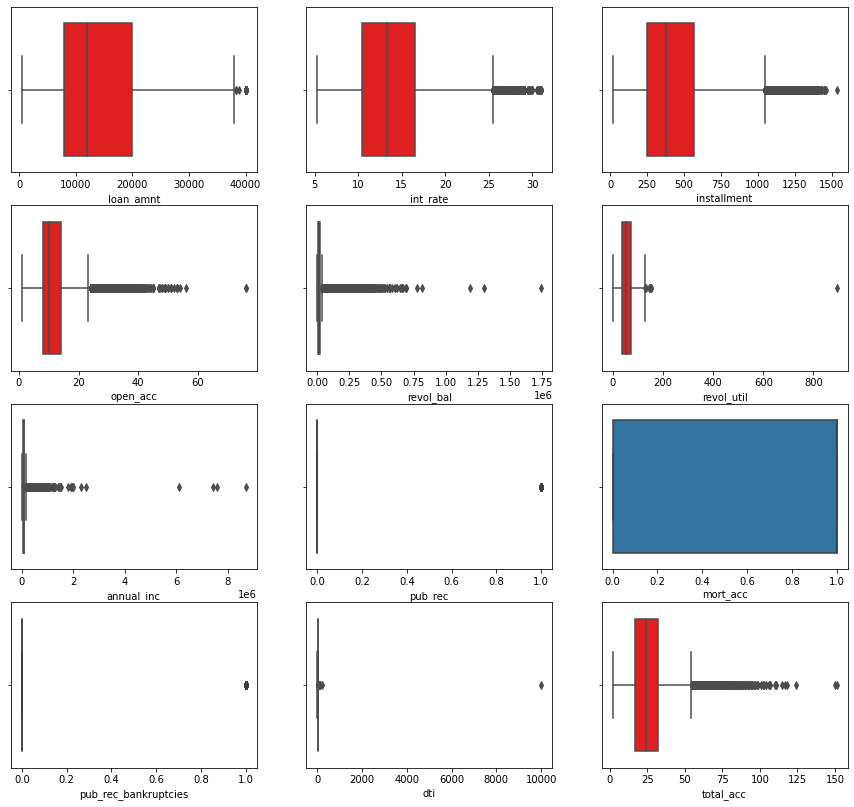

In [61]:
fig,axes = plt.subplots(nrows = 4,ncols = 3,figsize=(15, 14))
sns.boxplot(X_train['loan_amnt'],  color ='red',ax = axes[0,0])
sns.boxplot(X_train['int_rate'],  color ='red',ax = axes[0,1])
sns.boxplot(X_train['installment'], color ='red',ax = axes[0,2])
sns.boxplot(X_train['dti'],  color ='red',ax = axes[3,1])
sns.boxplot(X_train['open_acc'],  color ='red',ax = axes[1,0])
sns.boxplot(X_train['revol_bal'],  color ='red',ax = axes[1,1])
sns.boxplot(X_train['revol_util'],  color ='red',ax = axes[1,2])
sns.boxplot(X_train['total_acc'],  color ='red',ax = axes[3,2])
sns.boxplot(X_train['annual_inc'],  color ='red',ax = axes[2,0])
sns.boxplot(x = X_train['pub_rec'],ax=axes[2,1])
sns.boxplot(x = X_train['mort_acc'],ax=axes[2,2])
sns.boxplot(x = df['pub_rec_bankruptcies'],ax=axes[3,0])

In [62]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt               12000.00
int_rate                    6.00
installment               318.37
grade                       2.00
emp_length                  5.00
annual_inc              45000.00
verification_status         2.00
dti                        11.68
open_acc                    6.00
pub_rec                     0.00
revol_bal               13617.00
revol_util                 37.10
total_acc                  15.00
initial_list_status         1.00
application_type            0.00
mort_acc                    1.00
term                        0.00
pub_rec_bankruptcies        0.00
dtype: float64


In [63]:
cols2 = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 
        'emp_length',  'annual_inc',
       'verification_status', 
       'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', ]
for i in cols2:
  open_acc_25 = X_train[i].quantile(0.25)
  open_acc_75 = X_train[i].quantile(0.75)
  iqr2 = open_acc_75 - open_acc_25
  upper_limit2= open_acc_75 + 1.5 * iqr2
  lower_limit2 = open_acc_25 - 1.5 * iqr2

  X_train[i] = np.where(
      X_train[i] > upper_limit2,
      upper_limit2,
      np.where(
          X_train[i] < lower_limit2,
          lower_limit2,
          X_train[i]
      )
  )

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

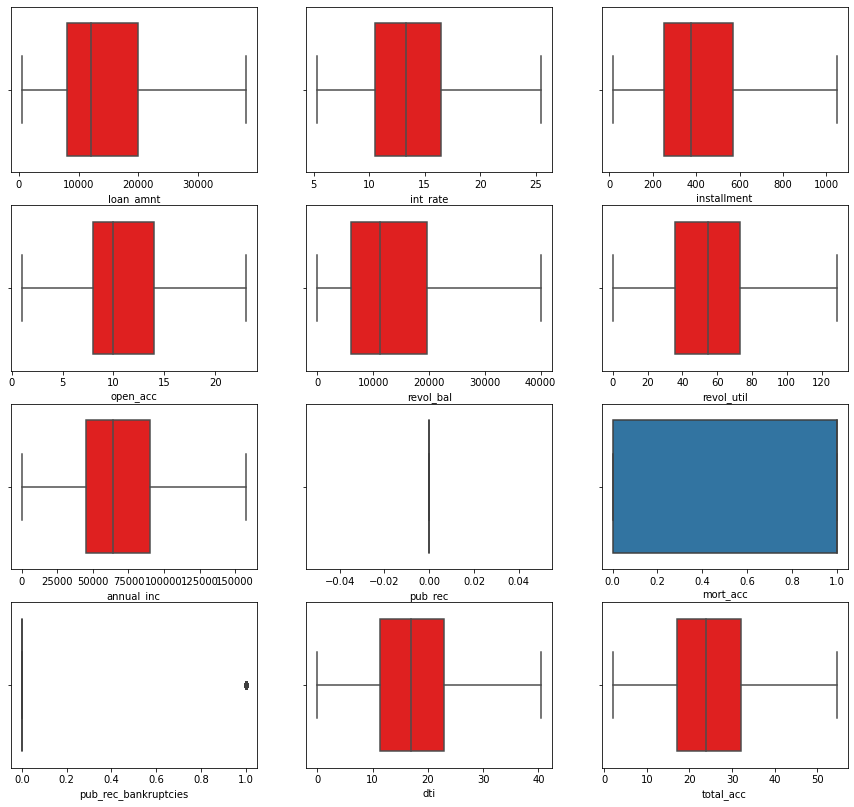

In [64]:
fig,axes = plt.subplots(nrows = 4,ncols = 3,figsize=(15, 14))
sns.boxplot(X_train['loan_amnt'],  color ='red',ax = axes[0,0])
sns.boxplot(X_train['int_rate'],  color ='red',ax = axes[0,1])
sns.boxplot(X_train['installment'], color ='red',ax = axes[0,2])
sns.boxplot(X_train['dti'],  color ='red',ax = axes[3,1])
sns.boxplot(X_train['open_acc'],  color ='red',ax = axes[1,0])
sns.boxplot(X_train['revol_bal'],  color ='red',ax = axes[1,1])
sns.boxplot(X_train['revol_util'],  color ='red',ax = axes[1,2])
sns.boxplot(X_train['total_acc'],  color ='red',ax = axes[3,2])
sns.boxplot(X_train['annual_inc'],  color ='red',ax = axes[2,0])
sns.boxplot(x = X_train['pub_rec'],ax=axes[2,1])
sns.boxplot(x = X_train['mort_acc'],ax=axes[2,2])
sns.boxplot(x = df['pub_rec_bankruptcies'],ax=axes[3,0])

As from above box plots we can clearly see that Outliers were removed in good capacity.

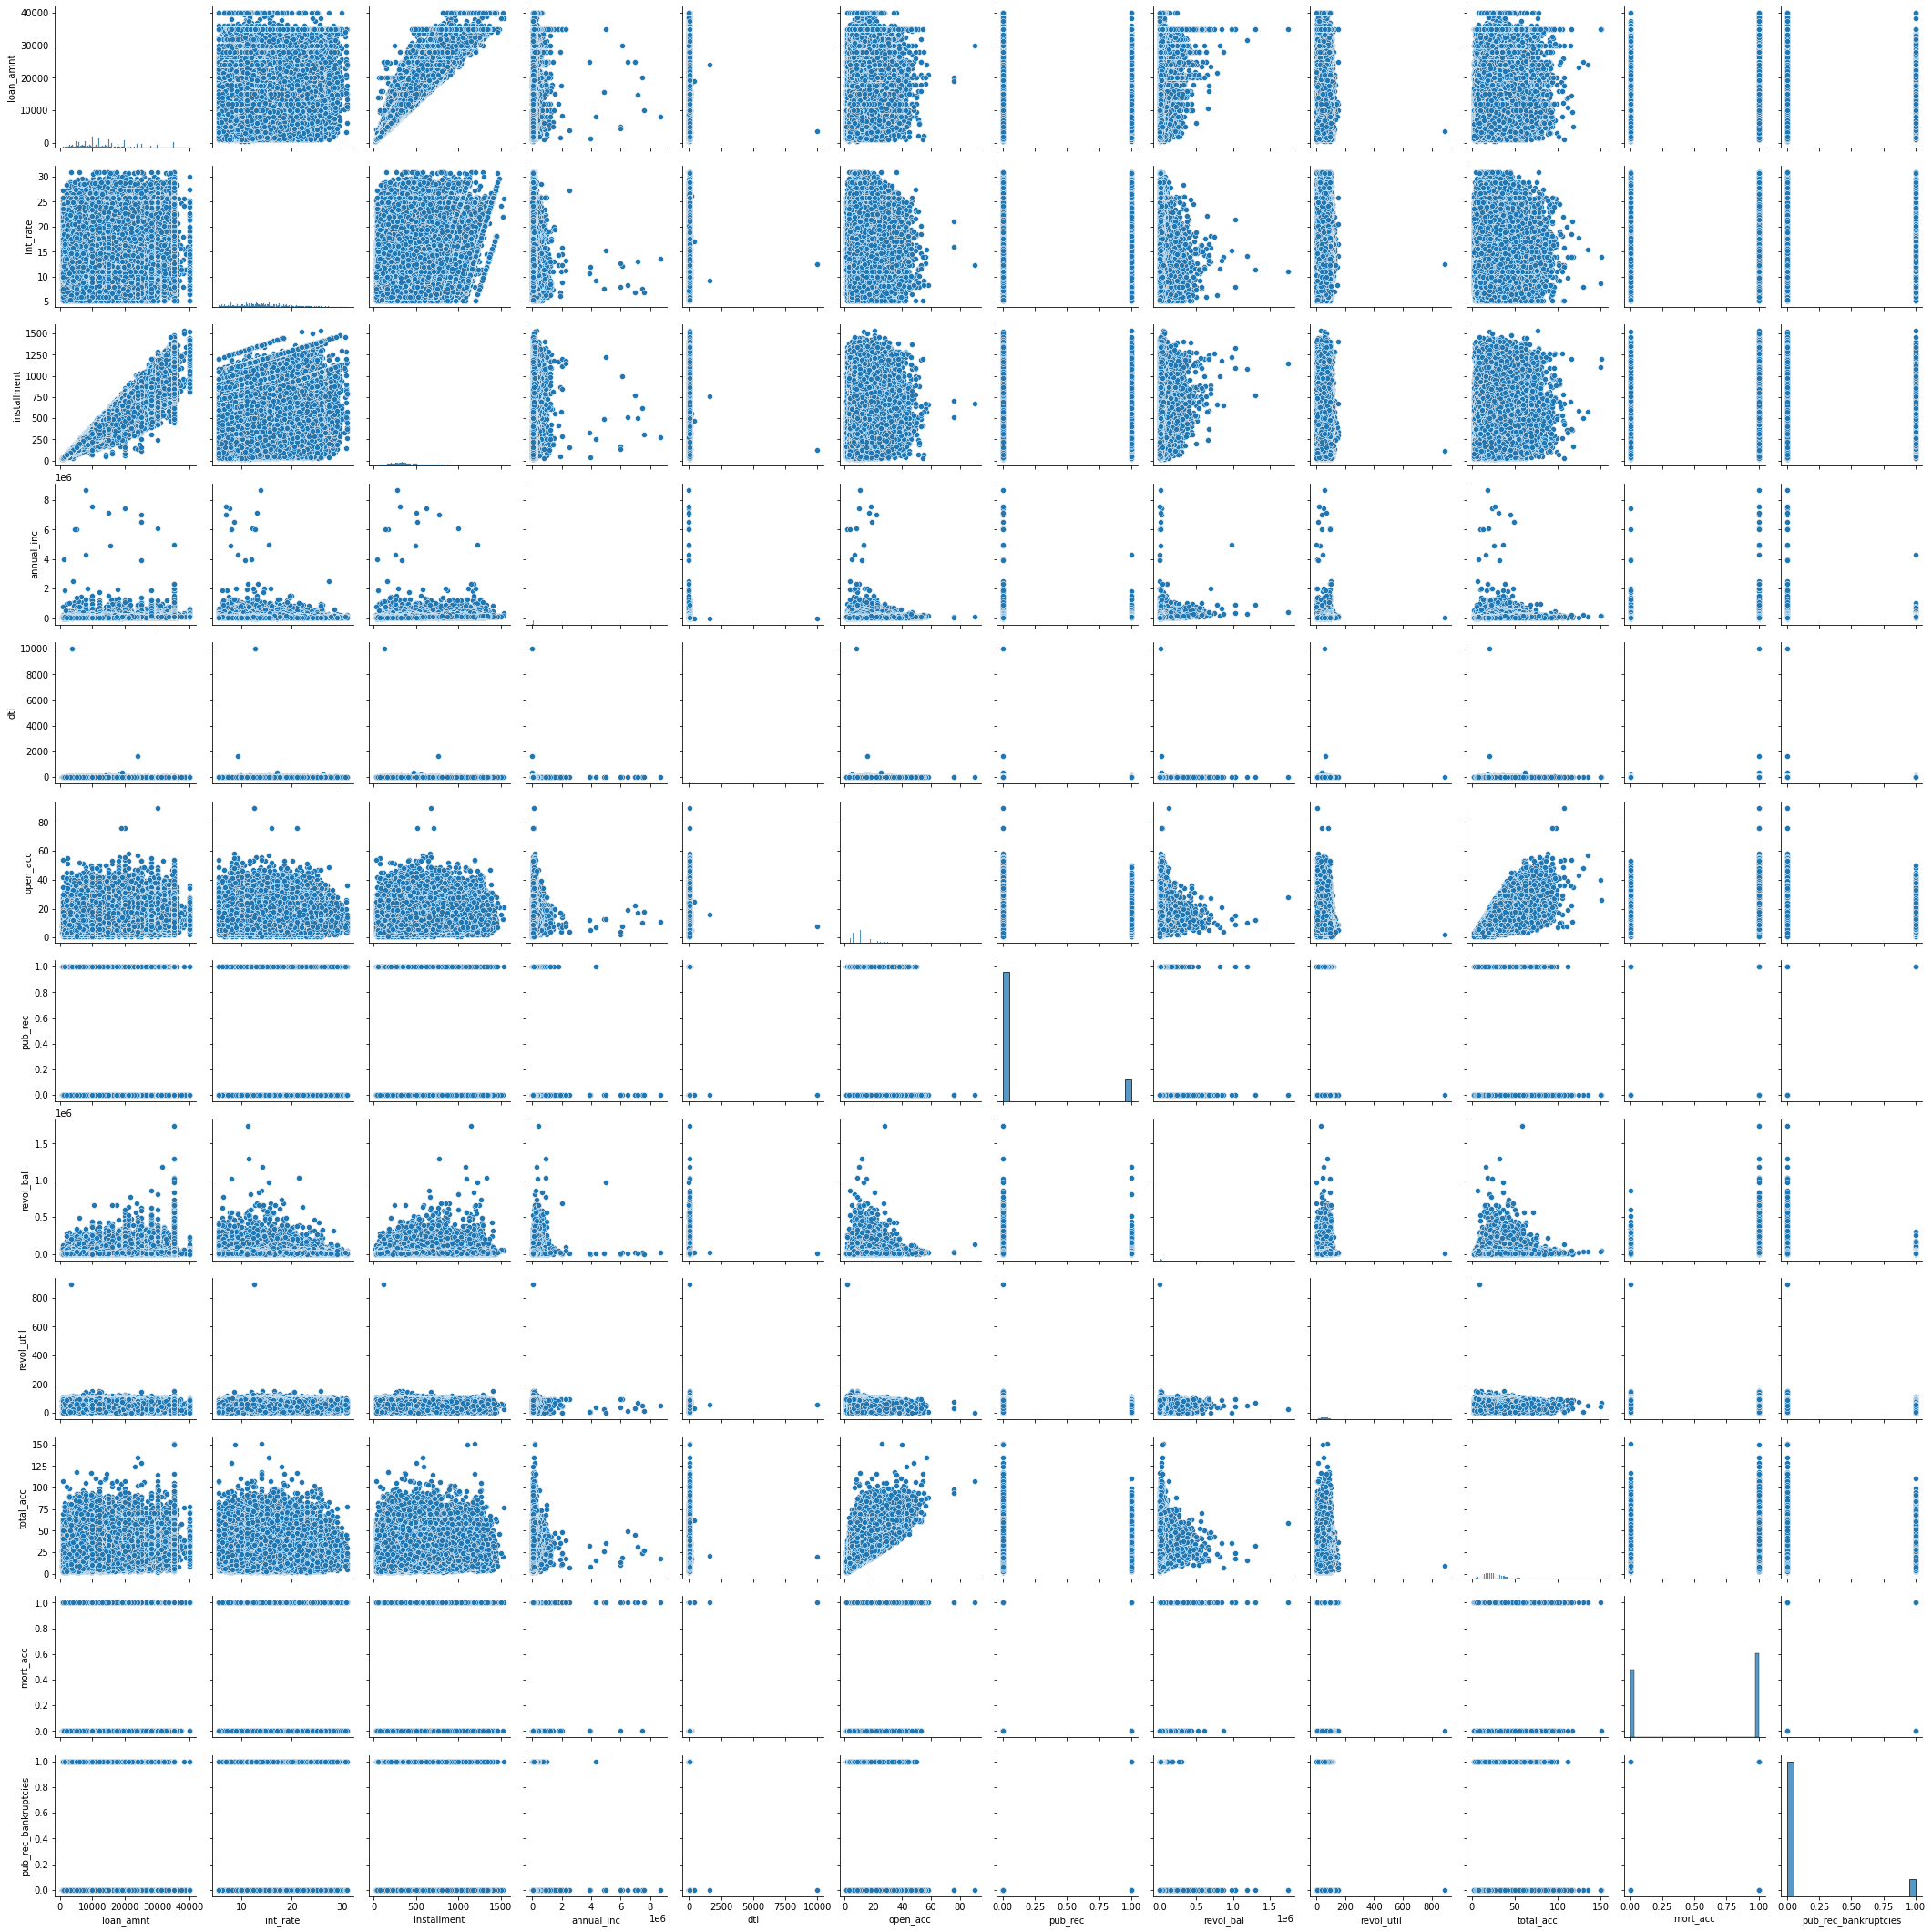

In [182]:
sns.pairplot(df)

As we can see in above plots, the relations between the features are proven as we have mentioned below Correlation.
1. Those who have lower annual income are exposed to less amount of loans, but still some individuals are exposed to big loans, which will increase bad loan cases.
2. Installments and Loan Amounts are directly proportional to each other, which seems that loan amount is well distributed in Installments.
3. Interest rates doesnot seems to be well distributed on the loan amount.


# Balancing Data using SMOTE

In [66]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
X_train.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'annual_inc', 'verification_status', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'term', 'pub_rec_bankruptcies'],
      dtype='object')

In [69]:
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0.0: 189923, 1.0: 189923})


# Training and Testing:

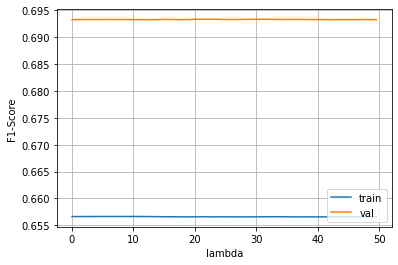

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

train_scores = []
val_scores = []
scaler = StandardScaler()
l = 0.01
h = 50.0
d = 0.5

for la in np.arange(l,h,d):
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_sm)
  train_y_pred = scaled_lr.predict(X_train)
  val_y_pred = scaled_lr.predict(X_test)
  train_score = f1_score(y_sm, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(list(np.arange(l,h,d)), train_scores, label="train")
plt.plot(list(np.arange(l,h,d)), val_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

#ROC-AUC Score:

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score


In [159]:
fpr, tpr, thr = roc_curve(y_val, val_y_pred)

In [193]:
roc_auc_score(y_val, val_y_pred)

0.7749938040551724

#Precision-Recall 

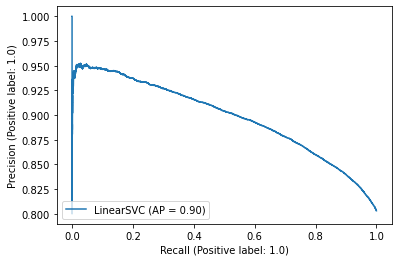

In [163]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    scaled_lr, X_test, y_test, name="LinearSVC"
)

In [167]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test, val_y_pred)

0.8830765381648354

In [169]:
recall_score(y_test, val_y_pred)

0.6691998988813752

#Confusion Matrix:

In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, val_y_pred)

array([[ 9900,  5608],
       [20937, 42355]])

In [172]:
tn,fp,fn,tp = confusion_matrix(y_test, val_y_pred).ravel()
(tn, fp, fn, tp)

(9900, 5608, 20937, 42355)

Insights:

From the data, we can observe that there are:
1. Loan Amount count is around 396030 and wrt to interest rate of Loan amt all data points are seems to be intact. 
2. The maximum loan amt seems to be 40k and similarly the interest rate for that is near to 30.99%. 
3. The installment for all this loans are seems to be econimic, as the max amount of installment is 1533. 
4. The annual income and loan amt is seemingly not getting any correlated, but it will be get cleared on correlation data. 
5. DTI(Debt to INcome ratio) according to above the observation, the ratio should be smaller, but in data it is seemingly opposite.
6. Other columns related to Accounts are seemingly dependent on each others.
7. So around 80% customers loans are fully paid.
8. As we can see 76% people have opted for 36 months tenure, as they want finish the loan as soon as possible.

Recommendations:
1. From the loan data it is clearly visible that who had experience length more than 10+ years are the community who is desired for loan and the other age community are less likely attracted towards loan, so the bank should be focusing more on marekting to consume them as customer. Maybe this age group has little exposed knowledge regarding loan, so arranging campaign for these group could be a great action.
2. The loan tenure is likely to be more towards 36 months, which reduces the interest rate earning to bank, so try to introduce a new plan consisting of 48 months or similar, so that the customers could also be able to use this and the bank earnings from interest will also rise.
3. It seeming that bank is not exposed to high amount security loans, so by introducing some positive more offers on higher loan amount will benefit banks on long run.
4. As seen that the customers are equally verified and not verified, so first reviewing the customer is important. It will help in giving bad loans and will help to improve ratings of the bank.
5. The interest rates are not making any relations with the loan amounts, may be because of some news. But yes, the rates should also make some relationships with the loan amount. 